In [1]:
import numpy as np
from loader import load_oneIC

In [12]:
import matplotlib.pyplot as plt
from wavelet_transform import wavelet_transform2

In [20]:
import matplotlib.colors as colors

In [10]:
import mne

In [3]:
import h5py

In [5]:
import time as tm

In [4]:
directory = "/home/INT/malfait.n/Documents/NIC_250819"
file = "FCK_LOCKED_IC_JYOTIKA_250819.mat"

path = f"{directory}/{file}"

mat_file = h5py.File(path, "r")
cells_refs = mat_file['FCK_LOCKED_IC_JYOTIKA']

n_IC = 4
n_subj = 23

In [7]:
target_dir = "tde-hmm2/tfr/"

In [6]:
subj_list = [i for i in range(2,9)] + [i for i in range(10,13)] + [14] + [i for i in range(16, n_subj+1)] 

##### Whole script

In [35]:
info = mne.create_info(ch_names=['signal'], sfreq=256, ch_types=['eeg'])
for subj in subj_list:
    try:
        print(f"---- SUBJECT{subj} ----")
        start_time = tm.time()
        # Create the input matrix for the TDE-HMM:
        print("Computing the imput matrix for the model")
        fig = plt.figure(figsize=(16,4*5))
        for IC in range(1, n_IC+1):
            plt.subplot(4, 1, IC)
            plt.title(f"Wavelet transform IC{IC}")
            try:
                data, n_trials = load_oneIC(mat_file, cells_refs, subj, IC, comp=False)
                tfr = wavelet_transform2(data, info, trial=np.arange(1,n_trials+1))
                plt.imshow(tfr[0], aspect='auto', origin='lower', extent=[-4, 3, 2, 50], 
                           norm=colors.PowerNorm(gamma=0.5), cmap='RdYlBu_r')
                plt.xlabel('Time (s)')
                plt.ylabel('Frequencies (Hz)')
                plt.colorbar()
                print(f"IC{IC} loaded")
            except:
                pass
        plt.savefig(target_dir + f'tfr-subj{subj}_mean.png', dpi=300)
        plt.close(fig)
        print("%s seconds" % (tm.time() - start_time))
        print(f"subj{subj}: OK")
    except:
        print("Ouch!")
        pass

---- SUBJECT2 ----
Computing the imput matrix for the model
Loading the raw timecourse
IC1 loaded
Loading the raw timecourse
IC2 loaded
Loading the raw timecourse
IC3 loaded
Loading the raw timecourse
IC4 loaded
37.017354011535645 seconds
subj2: OK
---- SUBJECT3 ----
Computing the imput matrix for the model
Loading the raw timecourse
IC1 loaded
Loading the raw timecourse
IC2 loaded
Loading the raw timecourse
IC3 loaded
Loading the raw timecourse
IC4 loaded
39.28636145591736 seconds
subj3: OK
---- SUBJECT4 ----
Computing the imput matrix for the model
Loading the raw timecourse
IC1 loaded
Loading the raw timecourse
IC2 loaded
Loading the raw timecourse
IC3 loaded
Loading the raw timecourse
IC4 loaded
44.93357586860657 seconds
subj4: OK
---- SUBJECT5 ----
Computing the imput matrix for the model
Loading the raw timecourse
IC1 loaded
Loading the raw timecourse
The independent component IC2 of the subject 5 is not in the .mat file.
Loading the raw timecourse
IC3 loaded
Loading the raw time

##### Tests

In [8]:
subj = 2

Loading the raw timecourse
IC1 loaded
Loading the raw timecourse
IC2 loaded
Loading the raw timecourse
IC3 loaded
Loading the raw timecourse
IC4 loaded


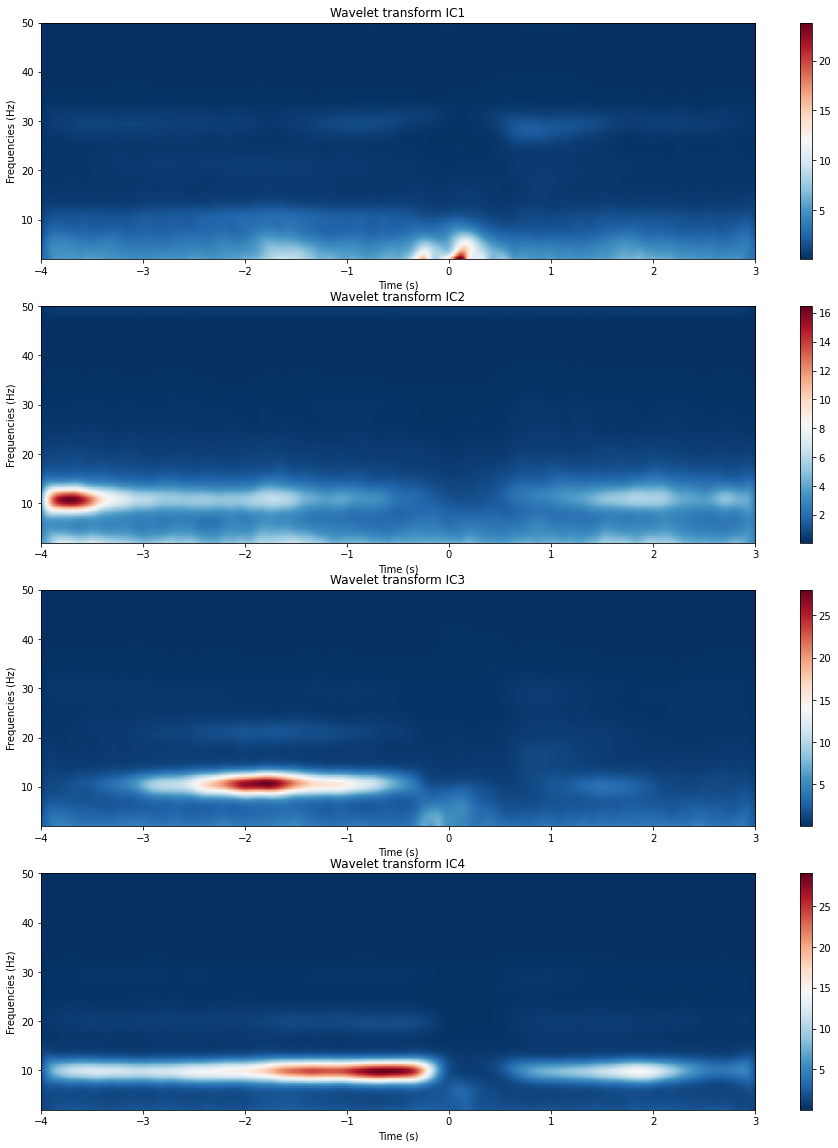

In [13]:
fig = plt.figure(figsize=(16,4*5))
for IC in range(1, n_IC+1):
    plt.subplot(4, 1, IC)
    plt.title(f"Wavelet transform IC{IC}")
    data, n_trials = load_oneIC(mat_file, cells_refs, subj, IC, comp=False)
    info = mne.create_info(ch_names=['signal'], sfreq=256, ch_types=['eeg'])
    tfr = wavelet_transform2(data, info, trial=np.arange(1,n_trials+1))
    plt.imshow(tfr[0], aspect='auto', origin='lower', extent=[-4, 3, 2, 50], cmap='RdBu_r')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequencies (Hz)')
    plt.colorbar()
    print(f"IC{IC} loaded")

Loading the raw timecourse
IC1 loaded
Loading the raw timecourse
IC2 loaded
Loading the raw timecourse
IC3 loaded
Loading the raw timecourse
IC4 loaded


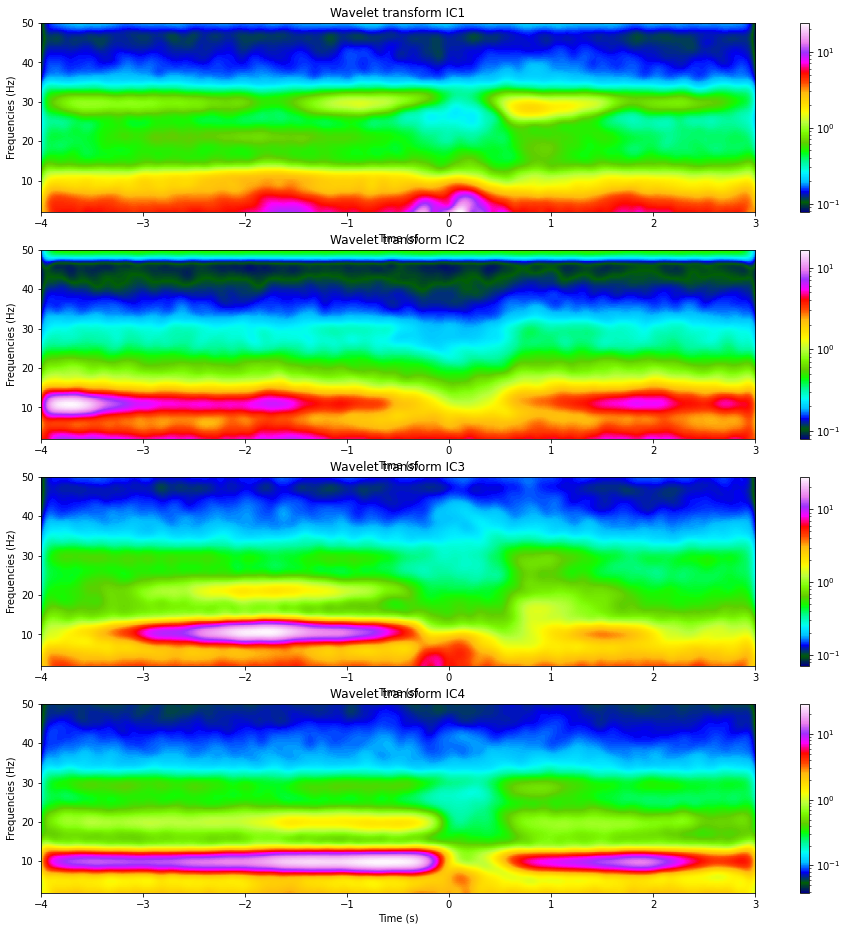

In [22]:
fig = plt.figure(figsize=(16,4*4))
for IC in range(1, n_IC+1):
    plt.subplot(4, 1, IC)
    plt.title(f"Wavelet transform IC{IC}")
    data, n_trials = load_oneIC(mat_file, cells_refs, subj, IC, comp=False)
    info = mne.create_info(ch_names=['signal'], sfreq=256, ch_types=['eeg'])
    tfr = wavelet_transform2(data, info, trial=np.arange(1,n_trials+1))
    plt.imshow(tfr[0], aspect='auto', origin='lower', extent=[-4, 3, 2, 50], 
               norm=colors.LogNorm(vmin=tfr[0].min(), vmax=tfr[0].max()), cmap='gist_ncar')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequencies (Hz)')
    plt.colorbar()
    print(f"IC{IC} loaded")

Loading the raw timecourse
IC1 loaded
Loading the raw timecourse
IC2 loaded
Loading the raw timecourse
IC3 loaded
Loading the raw timecourse
IC4 loaded


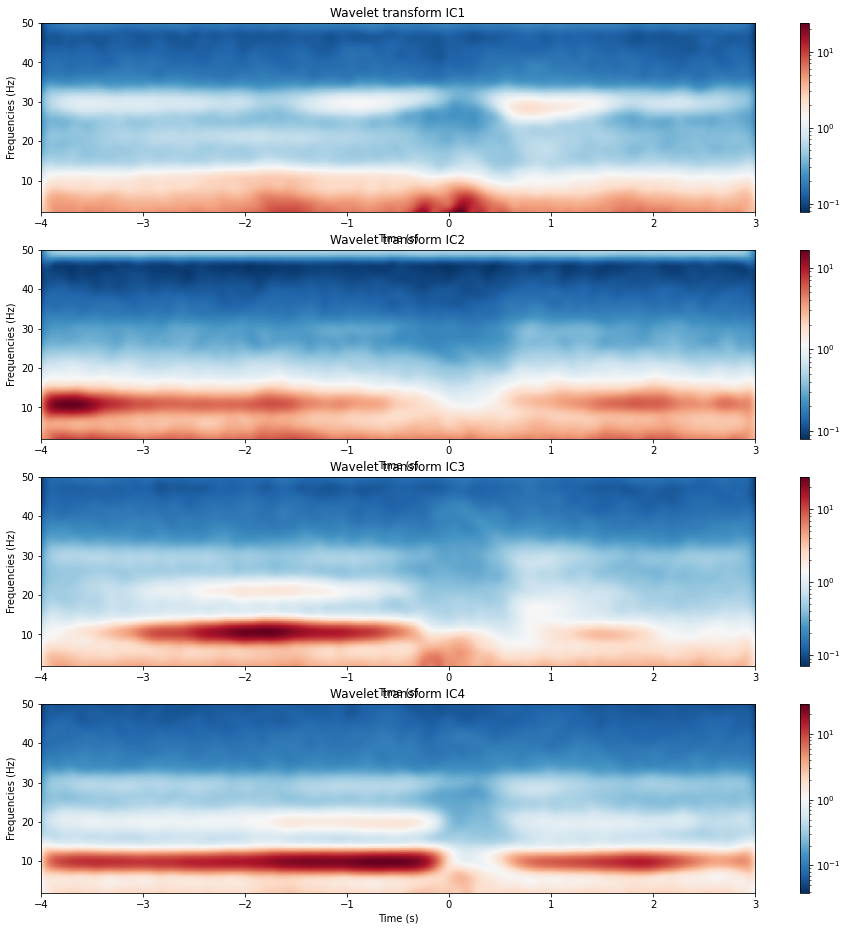

In [21]:
fig = plt.figure(figsize=(16,4*4))
for IC in range(1, n_IC+1):
    plt.subplot(4, 1, IC)
    plt.title(f"Wavelet transform IC{IC}")
    data, n_trials = load_oneIC(mat_file, cells_refs, subj, IC, comp=False)
    info = mne.create_info(ch_names=['signal'], sfreq=256, ch_types=['eeg'])
    tfr = wavelet_transform2(data, info, trial=np.arange(1,n_trials+1))
    plt.imshow(tfr[0], aspect='auto', origin='lower', extent=[-4, 3, 2, 50], 
               norm=colors.LogNorm(vmin=tfr[0].min(), vmax=tfr[0].max()), cmap='RdBu_r')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequencies (Hz)')
    plt.colorbar()
    print(f"IC{IC} loaded")

Loading the raw timecourse
IC1 loaded
Loading the raw timecourse
IC2 loaded
Loading the raw timecourse
IC3 loaded
Loading the raw timecourse
IC4 loaded


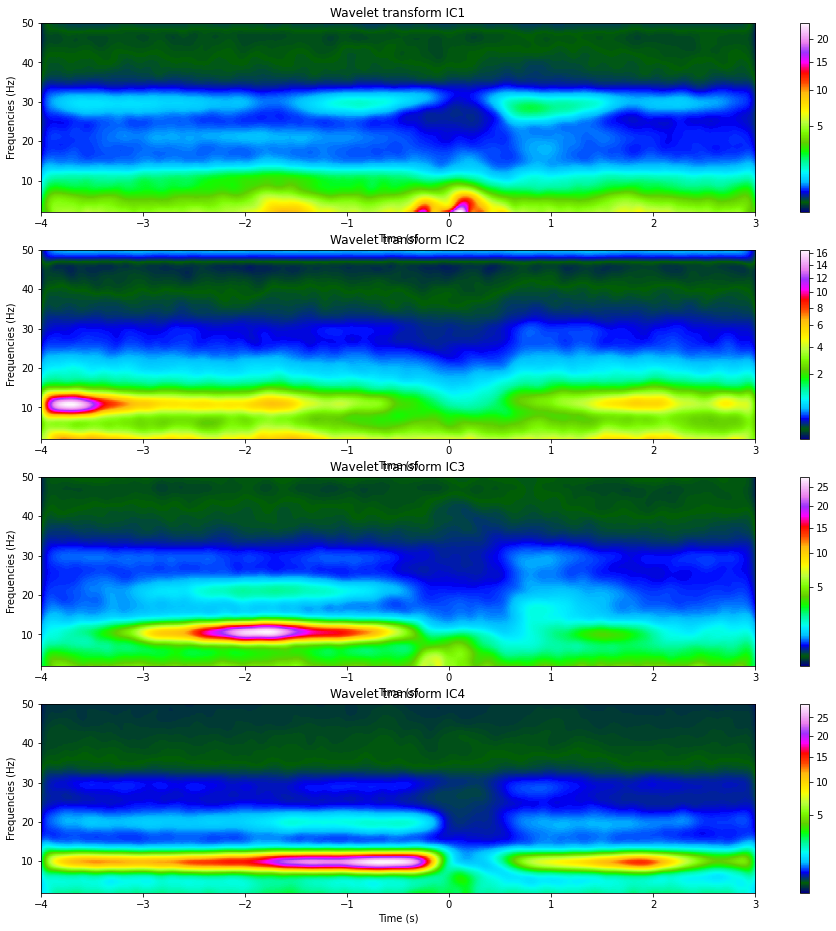

In [24]:
fig = plt.figure(figsize=(16,4*4))
for IC in range(1, n_IC+1):
    plt.subplot(4, 1, IC)
    plt.title(f"Wavelet transform IC{IC}")
    data, n_trials = load_oneIC(mat_file, cells_refs, subj, IC, comp=False)
    info = mne.create_info(ch_names=['signal'], sfreq=256, ch_types=['eeg'])
    tfr = wavelet_transform2(data, info, trial=np.arange(1,n_trials+1))
    plt.imshow(tfr[0], aspect='auto', origin='lower', extent=[-4, 3, 2, 50], 
               norm=colors.PowerNorm(gamma=0.5), cmap='gist_ncar')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequencies (Hz)')
    plt.colorbar()
    print(f"IC{IC} loaded")

Loading the raw timecourse
IC1 loaded
Loading the raw timecourse
IC2 loaded
Loading the raw timecourse
IC3 loaded
Loading the raw timecourse
IC4 loaded


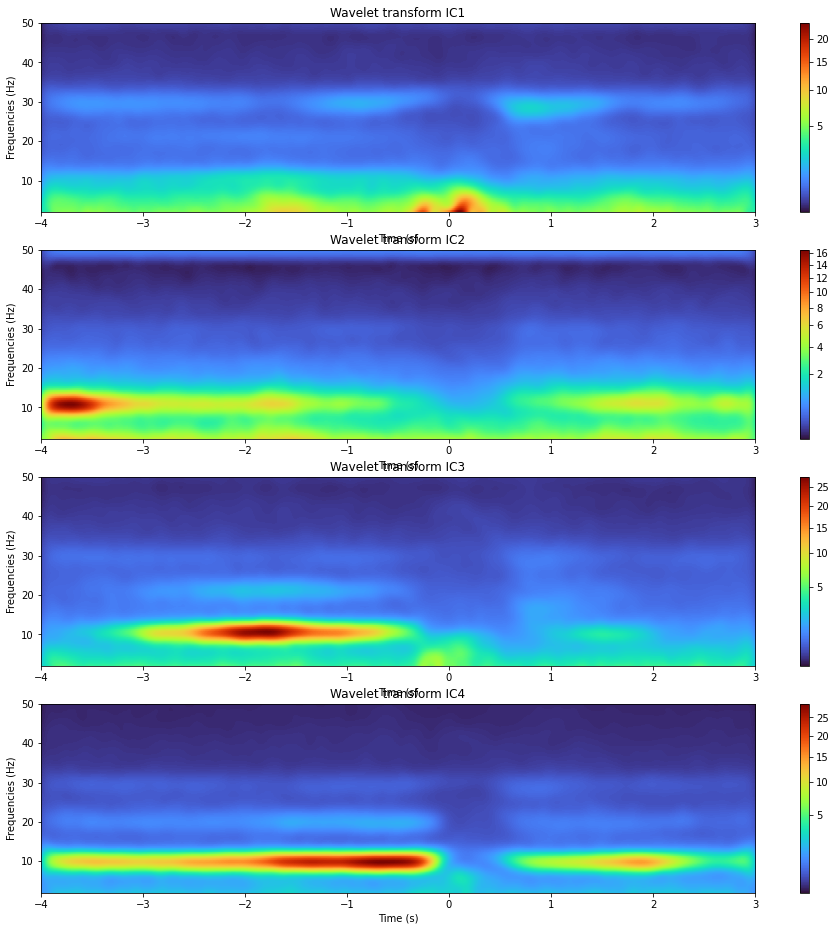

In [27]:
fig = plt.figure(figsize=(16,4*4))
for IC in range(1, n_IC+1):
    plt.subplot(4, 1, IC)
    plt.title(f"Wavelet transform IC{IC}")
    data, n_trials = load_oneIC(mat_file, cells_refs, subj, IC, comp=False)
    info = mne.create_info(ch_names=['signal'], sfreq=256, ch_types=['eeg'])
    tfr = wavelet_transform2(data, info, trial=np.arange(1,n_trials+1))
    plt.imshow(tfr[0], aspect='auto', origin='lower', extent=[-4, 3, 2, 50], 
               norm=colors.PowerNorm(gamma=0.5), cmap='turbo')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequencies (Hz)')
    plt.colorbar()
    print(f"IC{IC} loaded")

Loading the raw timecourse
IC1 loaded
Loading the raw timecourse
IC2 loaded
Loading the raw timecourse
IC3 loaded
Loading the raw timecourse
IC4 loaded


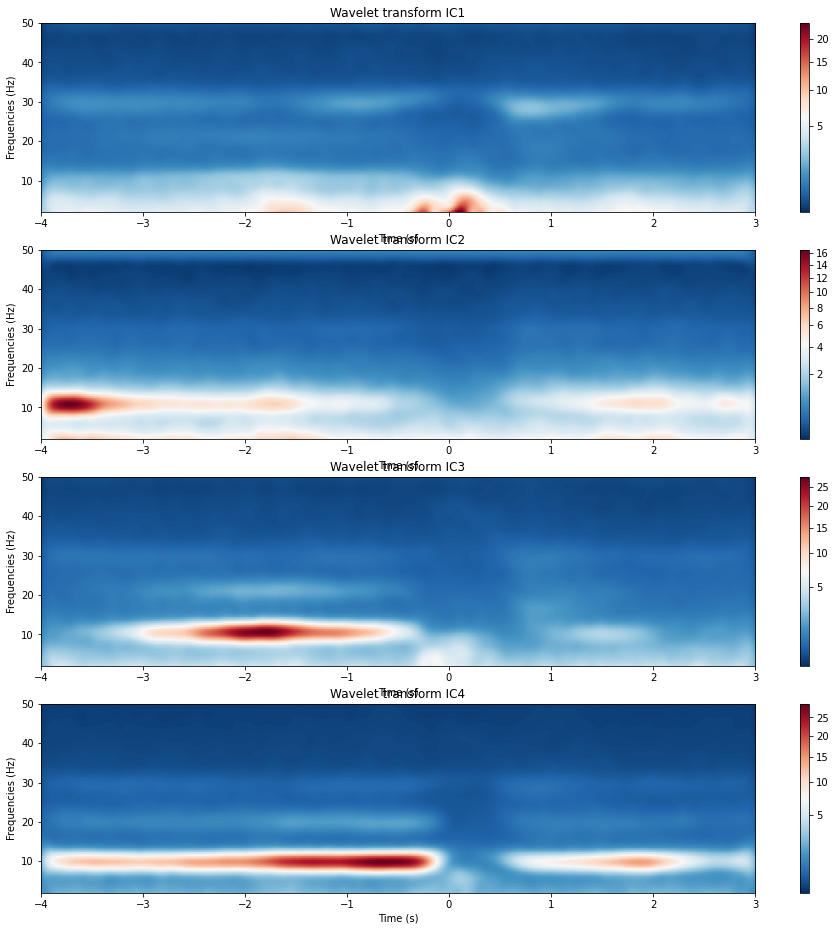

In [23]:
fig = plt.figure(figsize=(16,4*4))
for IC in range(1, n_IC+1):
    plt.subplot(4, 1, IC)
    plt.title(f"Wavelet transform IC{IC}")
    data, n_trials = load_oneIC(mat_file, cells_refs, subj, IC, comp=False)
    info = mne.create_info(ch_names=['signal'], sfreq=256, ch_types=['eeg'])
    tfr = wavelet_transform2(data, info, trial=np.arange(1,n_trials+1))
    plt.imshow(tfr[0], aspect='auto', origin='lower', extent=[-4, 3, 2, 50], 
               norm=colors.PowerNorm(gamma=0.5), cmap='RdBu_r')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequencies (Hz)')
    plt.colorbar()
    print(f"IC{IC} loaded")

Loading the raw timecourse
IC1 loaded
Loading the raw timecourse
IC2 loaded
Loading the raw timecourse
IC3 loaded
Loading the raw timecourse
IC4 loaded


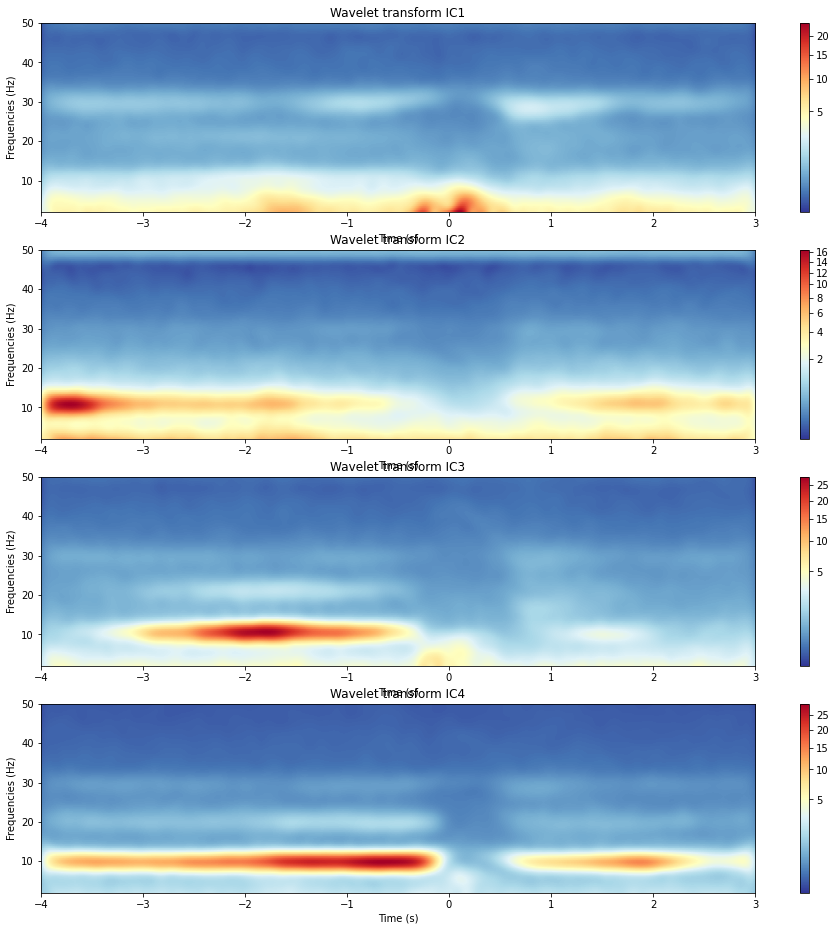

In [34]:
fig = plt.figure(figsize=(16,4*4))
for IC in range(1, n_IC+1):
    plt.subplot(4, 1, IC)
    plt.title(f"Wavelet transform IC{IC}")
    data, n_trials = load_oneIC(mat_file, cells_refs, subj, IC, comp=False)
    info = mne.create_info(ch_names=['signal'], sfreq=256, ch_types=['eeg'])
    tfr = wavelet_transform2(data, info, trial=np.arange(1,n_trials+1))
    plt.imshow(tfr[0], aspect='auto', origin='lower', extent=[-4, 3, 2, 50], 
               norm=colors.PowerNorm(gamma=0.4), cmap='RdYlBu_r')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequencies (Hz)')
    plt.colorbar()
    print(f"IC{IC} loaded")

Loading the raw timecourse
IC1 loaded
Loading the raw timecourse
IC2 loaded
Loading the raw timecourse
IC3 loaded
Loading the raw timecourse
IC4 loaded


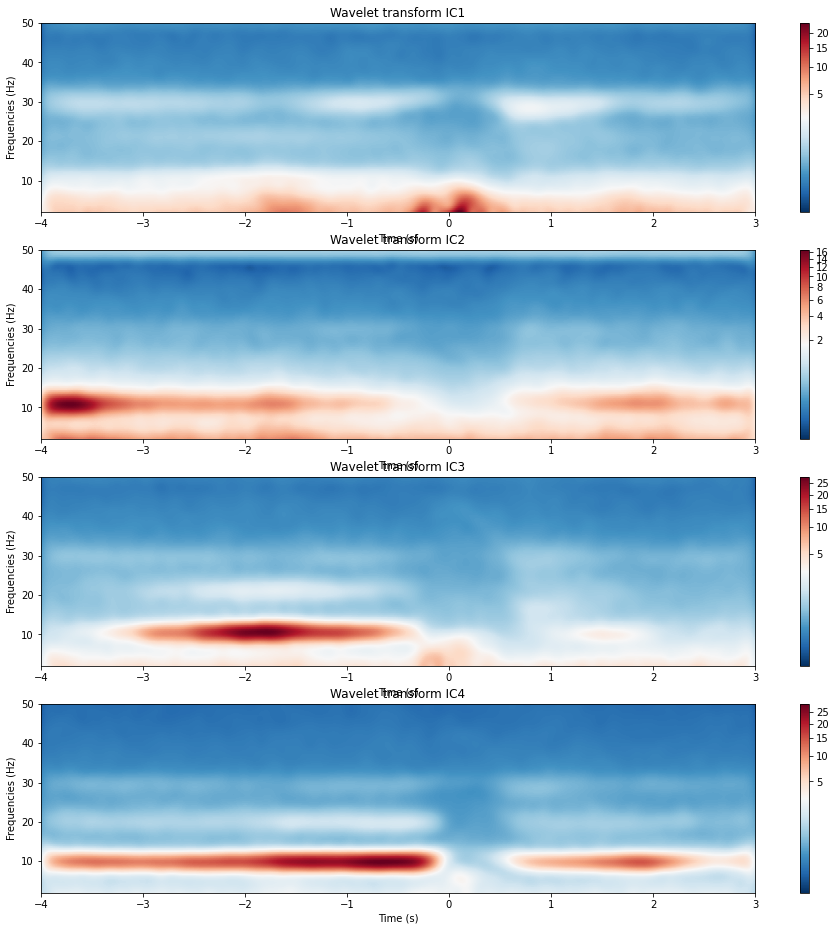

In [32]:
fig = plt.figure(figsize=(16,4*4))
for IC in range(1, n_IC+1):
    plt.subplot(4, 1, IC)
    plt.title(f"Wavelet transform IC{IC}")
    data, n_trials = load_oneIC(mat_file, cells_refs, subj, IC, comp=False)
    info = mne.create_info(ch_names=['signal'], sfreq=256, ch_types=['eeg'])
    tfr = wavelet_transform2(data, info, trial=np.arange(1,n_trials+1))
    plt.imshow(tfr[0], aspect='auto', origin='lower', extent=[-4, 3, 2, 50], 
               norm=colors.PowerNorm(gamma=0.3), cmap='RdBu_r')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequencies (Hz)')
    plt.colorbar()
    print(f"IC{IC} loaded")

Loading the raw timecourse
IC1 loaded
Loading the raw timecourse
IC2 loaded
Loading the raw timecourse
IC3 loaded
Loading the raw timecourse
IC4 loaded


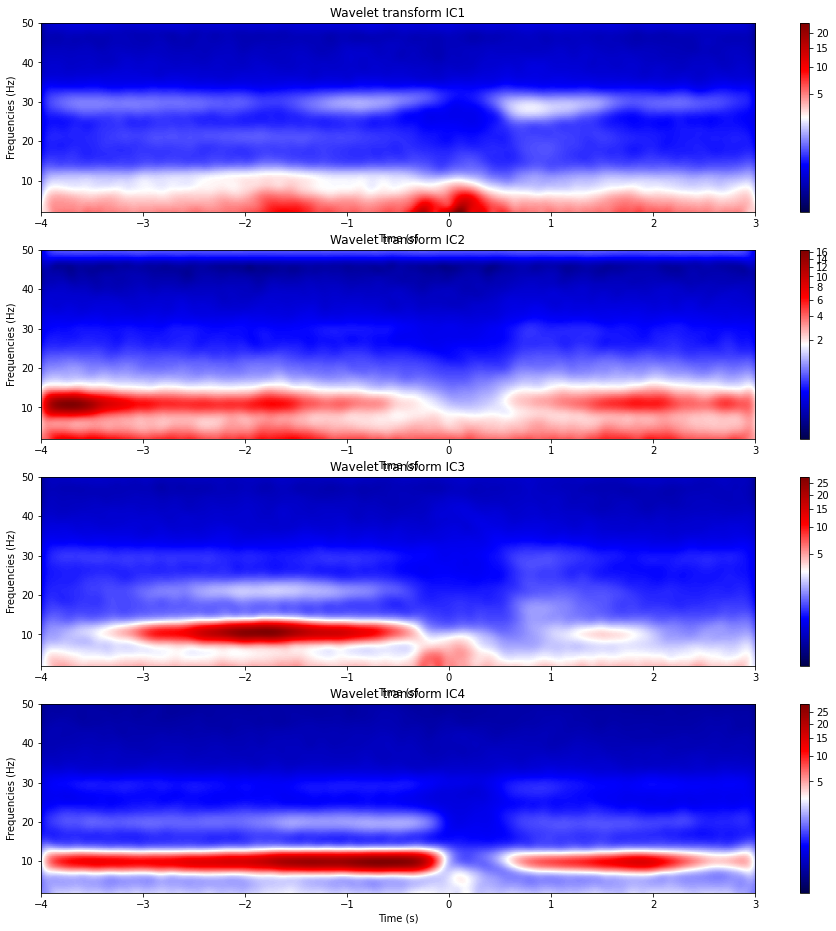

In [33]:
fig = plt.figure(figsize=(16,4*4))
for IC in range(1, n_IC+1):
    plt.subplot(4, 1, IC)
    plt.title(f"Wavelet transform IC{IC}")
    data, n_trials = load_oneIC(mat_file, cells_refs, subj, IC, comp=False)
    info = mne.create_info(ch_names=['signal'], sfreq=256, ch_types=['eeg'])
    tfr = wavelet_transform2(data, info, trial=np.arange(1,n_trials+1))
    plt.imshow(tfr[0], aspect='auto', origin='lower', extent=[-4, 3, 2, 50], 
               norm=colors.PowerNorm(gamma=0.3), cmap='seismic')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequencies (Hz)')
    plt.colorbar()
    print(f"IC{IC} loaded")